# An Analysis on Wonderland's Class and Social Structures  

Queenie Lau

14 August 2022

DIGHUM150C: Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

## Abstract
_Alice's Adventures in Wonderland_ by Lewis Caroll follows the adventures of a young girl named Alice who is thrown into the nonsensical world of Wonderland filled with extraordinary anthropomorphic creatures and individuals. In my final project, I intend to analyze the relationships and interactions between humans and anthropomorphic creatures to illustrate how animals with the most human-like qualities have a higher class standing than animals who don’t. Through the lens of these relationships, we can understand how class and social structures function in Wonderland, where humans reside in the hierarchy, and how Wonderland's social structures reflect that of Victorian England.

## Background
Lewis Carroll's Victorian fairy-tale novel _Alice’s Adventures in Wonderland_ (1865) is set during the Victorian period (1837-1901) when Queen Victoria reigned. During this era, Britain had a stable government, a prosperous economy, and shifted from a rural, agricultural society into an urban, industrial one. As for literature, characteristics of Victorian era literature loosely consisted of the following: the shift from Romantic ideals towards realism in literature, the portraying ideal lifestyles and characters, the conveyal of moral purpose, and the relation of humans to the idea of evolution (Characteristics of victorian era literature, novels and poetry).

## Part 1: Cleaning and Preprocessing Text
I first imported the respective libraries and tools which I will be using to analyze the text then split the novel into its respective chapters. Then, I filtered out the text for stop words and created a list of the characters for analysis.

In [3]:
import nltk
from nltk import word_tokenize
import networkx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib import request
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from spacy.lang.en.examples import sentences 
from spacy import displacy
import collections
from itertools import combinations

In [4]:
aliceInWonderland = nltk.corpus.gutenberg.raw('carroll-alice.txt')
aliceInWonderlandWords = [w for w in nltk.corpus.gutenberg.words('carroll-alice.txt') if w.isalpha()]

In [5]:
aliceInWonderlandChapters = {}

In [6]:
chapterOne = aliceInWonderland[69+22:11517]
chapterTwo = aliceInWonderland[11529+20:22513]
chapterThree = aliceInWonderland[22557:32072]
chapterFour = aliceInWonderland[32072+47:45950]
chapterFive = aliceInWonderland[45950+38:57943]
chapterSix = aliceInWonderland[57943+28:71810]
chapterSeven = aliceInWonderland[71810+30:84505]
chapterEight = aliceInWonderland[84505+42:98168]
chapterNine = aliceInWonderland[98168+38:110793]
chapterTen = aliceInWonderland[110793+34:122328]
chapterEleven = aliceInWonderland[122328+34:132727]
chapterTwelve = aliceInWonderland[132727+43:]

chapters = [chapterOne, chapterTwo, chapterThree, chapterFour, 
            chapterFive, chapterSix, chapterSeven, chapterEight, 
            chapterNine, chapterTen, chapterEleven, chapterTwelve]

In [7]:
for index in range(12):
    aliceInWonderlandChapters[index] = chapters[index]

In [8]:
aliceInWonderlandWordsLowered = [token.lower() for token in aliceInWonderlandWords if token.isalpha()]

In [9]:
filteredForStopWords = [word for word in aliceInWonderlandWordsLowered if word not in stopwords.words('english')]

In [10]:
aliceInWonderlandFreqs = nltk.FreqDist(filteredForStopWords)

In [18]:
nlp = spacy.load("en_core_web_lg")

In [19]:
doc = ""
for chapter in aliceInWonderlandChapters:
    doc += aliceInWonderlandChapters[chapter]
aliceInWonderlandDoc = nlp(doc)
aliceInWonderlandSents = list(aliceInWonderlandDoc.sents)

In [20]:
aliceInWonderlandCharacters = ["Alice", "Rabbit", "Duchess", "Mouse", "Lory", 
                               "Eaglet", "Dodo", "Crab", "Canary", "Bill", "Caterpillar",
                              "Pigeon","Footman", "mouse",
                               "Queen", "King", "Cheshire", "Hatter", "courtiers", "flamingo", "hedgehog",
                               "March", "Dormouse", "Two", "Five", "Seven", "soldiers", "Frog", "Fish",
                               "Knave", "Gryphon", "Mock", "Tortoise", "Lobster"]

## Part 2: Visualizing Dependency
Now, after cleaning the text and extracting the chapters, I utilized the networkx library to visualize the relationships between each of the characters. Without pre-existing knowledge about the novel, this visualization paves the path for further analysis and interpretation about the interpersonal relationships between the characters.

In [21]:
graph = networkx.Graph()
graph.add_nodes_from(aliceInWonderlandCharacters)

In [22]:
characterPairs = {pair:0 for pair in list(combinations(aliceInWonderlandCharacters,2))}

In [23]:
for chapter in aliceInWonderlandChapters.values():
    for charPair in characterPairs:
        if charPair[0] in chapter and charPair[1] in chapter:
            characterPairs[charPair] += 1

In [24]:
for pair, weight in characterPairs.items():
    if (weight > 0):
        graph.add_edge(pair[0], pair[1], weight=weight)

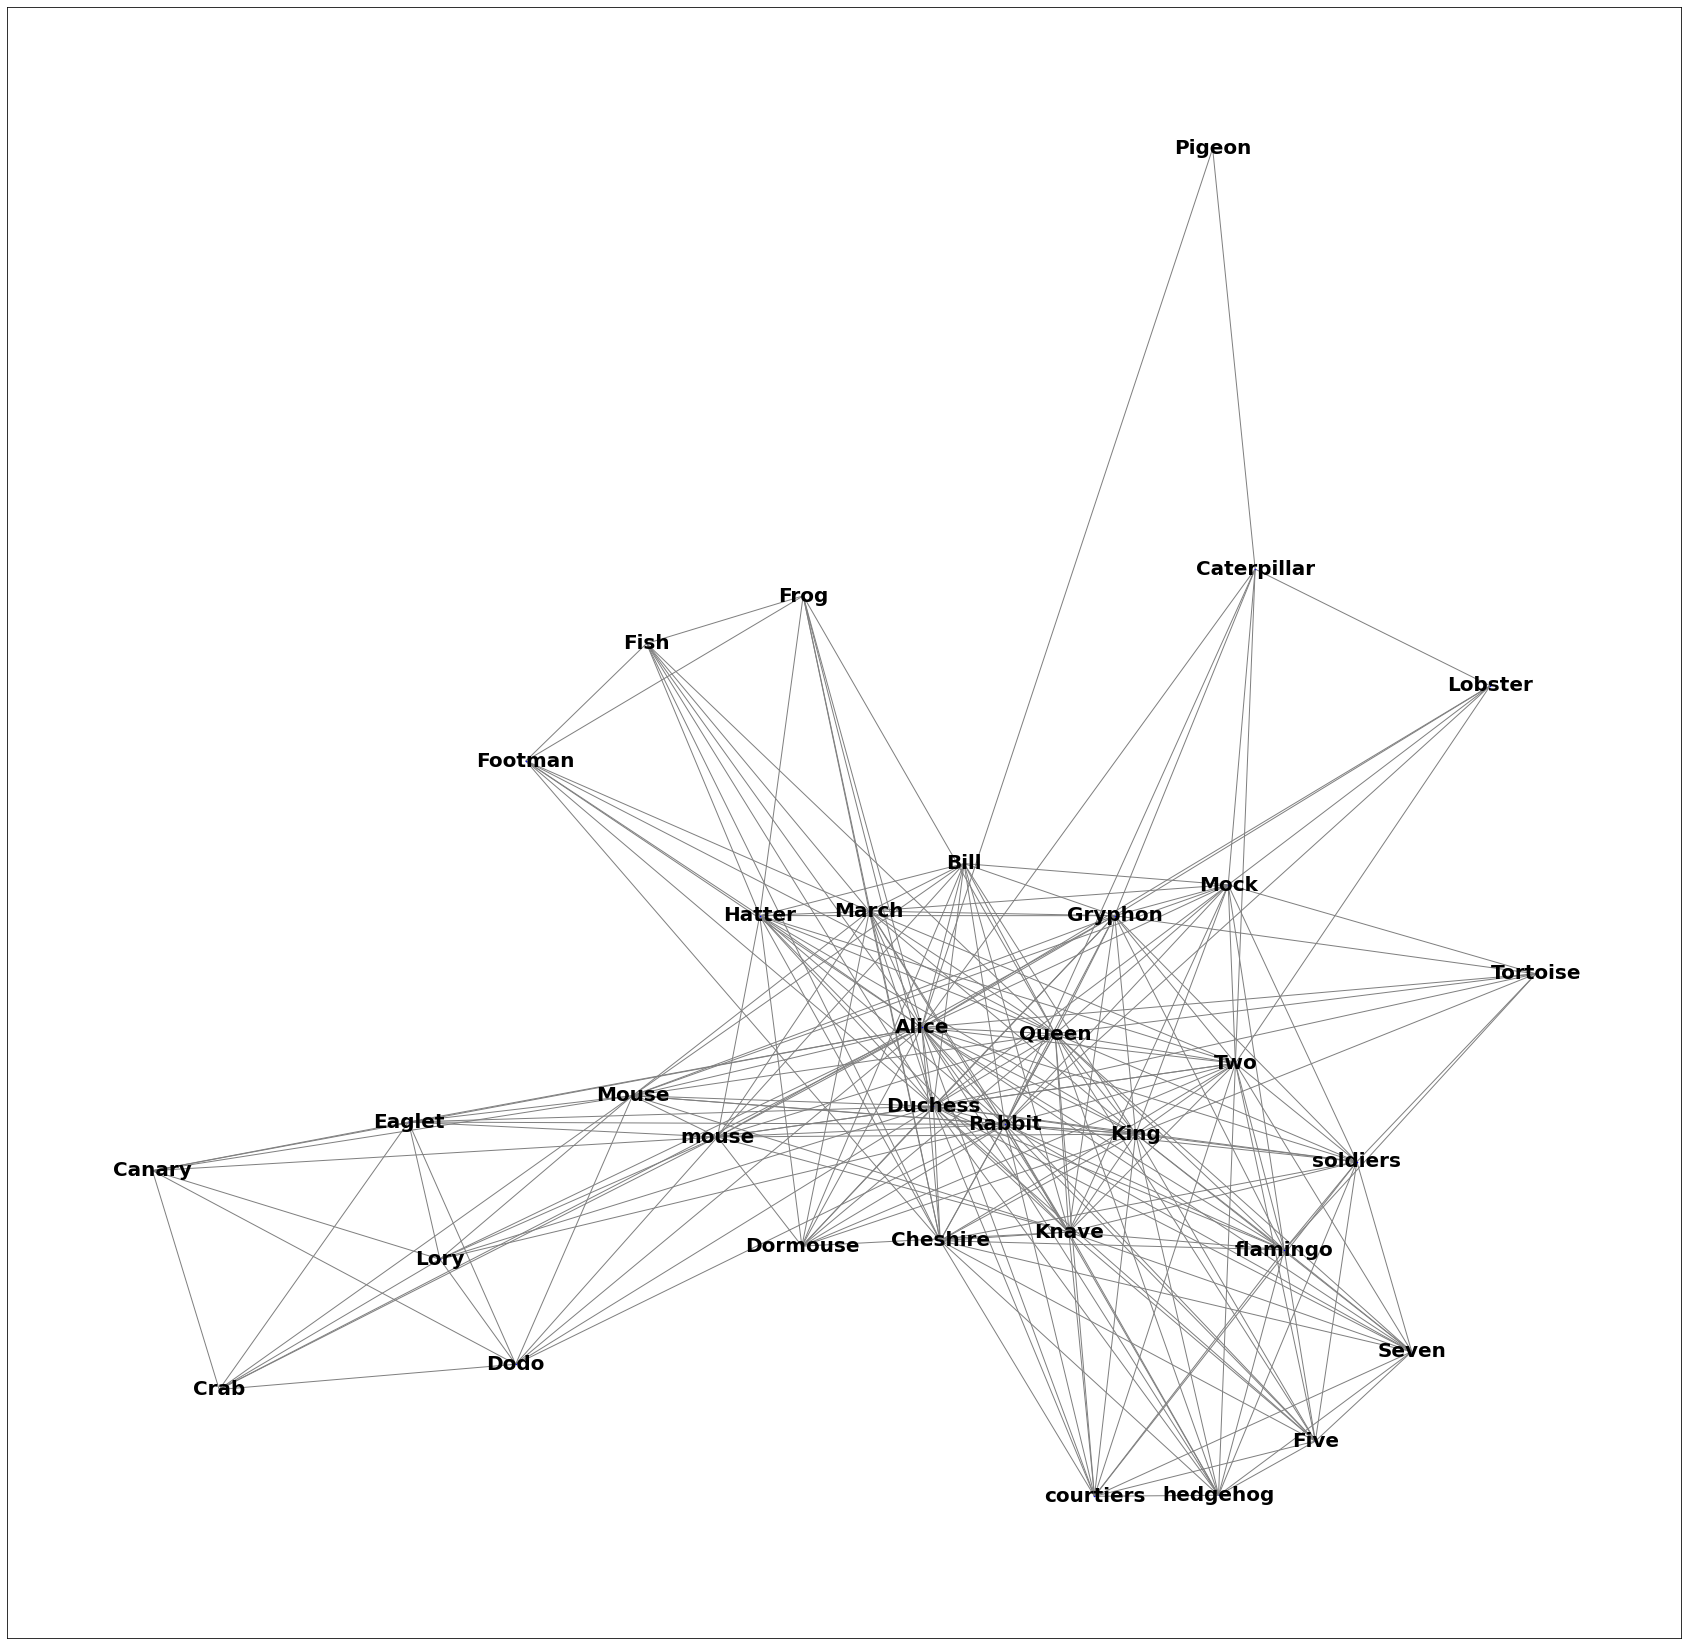

In [25]:
plt.figure(figsize=(30,30))
networkx.draw_networkx(graph,node_size=1,font_size=20,font_weight="bold",linewidths=0.5,font_color="black",edge_color="gray",node_color="blue")

Here, we see how those clustered in the center are characters such as the White Rabbit, the Knave, King, Queen,and the Duchess. On the other hand, characters and creatures farther away from the center are those who aren’t as “connected” to the rest of the characters because they often serve other characters, such as the Queen.

In [26]:
centrality = networkx.eigenvector_centrality(graph)

In [27]:
centralityDict = dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True))

for index,char in enumerate(centralityDict):
    if (index < 5):
        print(f"{char}, {centralityDict[char]}")

Alice, 0.28633518292756127
Duchess, 0.27194725901133954
Rabbit, 0.2595183834611374
Queen, 0.258796758537166
King, 0.2443507236280499


Upon retrieving the centrality of the social network visualization, we see that Alice has the highest value of around 0.29, followed by the Duchess, Alice's cat, the White Rabbit, and finally, the Queen. Given that Alice is the protagonist of the film, it isn't a shock that she is the main protagonist of the novel. Her journey into Wonderland highlights the characters and creatures she meets along the way. As for The Duchess and the White Rabbit, these characters are ones that Alice meets right at the beginning of the novel.

> It was the White Rabbit, trotting slowly back again, and looking anxiously about as it went, as if it had lost something; and she heard it muttering to itself “The Duchess! The Duchess! Oh my dear paws! Oh my fur and whiskers! She’ll get me executed, as sure as ferrets are ferrets! Where can I have dropped them, I wonder?”) (CHAPTER IV.
The Rabbit Sends in a Little Bill)

Our implicit introduction to The Duchess is through the White Rabbit as opposed to Alice meeting the Duchess along her journey. Here, we learn that the White Rabbit serves The Duchess because of his anxiety towards not satisfying the Duchess' needs and desires. As for the Queen and King, these characters rule the kingdom of Wonderland so they are often brought up in trivial conversation.

> The Fish-Footman began by producing from under his arm a great letter, nearly as large as himself, and this he handed over to the other, saying, in a solemn tone, “For the Duchess. An invitation from the Queen to play croquet.” (CHAPTER VI. Pig and Pepper)

In chapter five, the Queen is first mentioned in the novel. Akin to the Duchess, we don't receive a formal introduction to these characters. We learn about their status and characteristics through the lens of other characters. The Queen extending an invitation to the Duchess to play croquet insinuates that the Duchess is of noble status.

These relationships, as shown in the social network visualization, will become clearer as we uncover the roles and internal, social rankings of these characters.

To further analyze character relationships, I created a function to get the sentences involving each of the characters. The function takes in text from a chapter and a characters array. 
Then, I used nltk to get the sentences of each of the chapter and proceeded to iterate through each sentence and check if any of the words in the sentence matched a character name. Finally, I returned an array of the matched sentences.

In [28]:
def getSentencesInvolvingCharacters(chapter, characters):
    sentences = nltk.sent_tokenize(chapter)
    sentencesInvolvingChars = []
    for sentence in sentences:
        wordsInSentence = nltk.word_tokenize(sentence)
        if any(word in wordsInSentence for word in characters):
            sentencesInvolvingChars.append(sentence)
    return sentencesInvolvingChars

In [29]:
getSentencesInvolvingCharacters(chapterTwo, aliceInWonderlandCharacters)[4]

"It was the White\nRabbit returning, splendidly dressed, with a pair of white kid gloves in\none hand and a large fan in the other: he came trotting along in a great\nhurry, muttering to himself as he came, 'Oh!"

The above is an example of calling the function for sentences in chapter two. In this sentence, we begin to get a glimpse into the human-like qualities that animals in Wonderland possess. Here, the White Rabbit is described as “splendidly dressed” with human accessories. This is important because we’ll later see how other creatures and humans are described in comparison. Having previously learned that the White Rabbit serves the Duchess, we can deduce that the White Rabbit ranks below the Duchess (a human) in terms of social standing.

In [30]:
aliceInWonderlandProperNouns = [w for w in aliceInWonderlandDoc if w.pos_ == "PROPN"]

In [31]:
chars = [properNoun for properNoun in aliceInWonderlandProperNouns if str(properNoun) in aliceInWonderlandCharacters]

In [32]:
charsDict = {char:[] for char in chars}

for properNoun in charsDict:
    children = [word for word in list(properNoun.children) if word.pos_ == "ADJ"]
    for child in children:
        charsDict[properNoun].append(children)

In [33]:
aliceInwonderlandAdj = [(w, list(w.ancestors)) for w in aliceInWonderlandDoc if w.pos_ == "ADJ"]

In [34]:
def getPartOfSpeechDescribingCharacter(character, partOfSpeechList):
    partOfSpeechDescribingChar = []
    for pair in partOfSpeechList:
        for adj in pair[1]:
            if (character == str(adj)):
                partOfSpeechDescribingChar.append(pair[0])
    return partOfSpeechDescribingChar

In [35]:
def getPartOfSpeechDescribingCharacterCounter(partOfSpeechDescribingChar):
    adjectivesDescribingCharCounter = {}
    for adj in adjectivesDescribingChar:
        if ((str(adj) not in adjectivesDescribingCharCounter)):
            adjectivesDescribingCharCounter[str(adj)] = 1
        else:
             adjectivesDescribingCharCounter[str(adj)] += 1
    return adjectivesDescribingCharCounter

In [36]:
aliceInWonderlandCharactersDict = {}
for char in aliceInWonderlandCharacters:
    adjectivesDescribingChar = list(getPartOfSpeechDescribingCharacter(char, aliceInwonderlandAdj))
    if (len(adjectivesDescribingChar) > 0):
        aliceInWonderlandCharactersDict[char] = getPartOfSpeechDescribingCharacterCounter(adjectivesDescribingChar)

In [37]:
aliceInWonderlandCharactersDict["Alice"]

{'poor': 10,
 'wise': 1,
 'little': 4,
 'surprised': 1,
 'great': 3,
 'good': 1,
 'sudden': 1,
 'glad': 2,
 'wooden': 1,
 'melancholy': 1,
 'foolish': 1,
 'truthful': 1,
 'excellent': 1,
 'other': 1,
 'last': 1,
 'ready': 1,
 'round': 1,
 'interesting': 1,
 'porpoise': 1,
 'unimportant': 1,
 'wonderful': 1}

Though the count is quite low for a majority of adjectives describing Alice, we can see that the top two adjectives are “poor” and “little.” It’s slowly becoming clear that Alice, a human girl who’s been educated and accustomed to life in Victorian England, does not possess that same status in Wonderland.


In [38]:
aliceInWonderlandCharactersDict["Rabbit"]

{'pink': 1, 'White': 1, 'low': 2, 'hurried': 1}

In [39]:
aliceInWonderlandCharactersDict["Hatter"]

{'silent': 1, 'much': 1, 'easy': 1, 'MORE': 1, 'wretched': 1, 'miserable': 1}

In [40]:
aliceInWonderlandCharactersDict["Queen"]

{'flat': 1, 'shrill': 1, 'loud': 1, 'royal': 1}

In [41]:
aliceInWonderlandCharactersDict["King"]

{'royal': 1}

In [42]:
aliceInWonderlandCharactersDict["Duchess"]

{'moral': 1, 'clear': 1, 'ready': 1, 'large': 1}

As seen above, we can further extract information regarding character personality traits and social status for characters like the Hatter, The Duchess, Rabbit, Queen, and King.

Interestingly enough, we see that the hatter, who is human in Wonderland, is described as “wretched” and “miserable” whereas the Duchess, a noble human resident of Wonderland who gets invited to play croquet with the Queen, doesn’t have any of these negative traits associated with her.

As for adjectives describing the White Rabbit as hurried and the Queen and King as royal, we can’t extract that much information from these, but it’s clear that there isn’t a negative connotation in their descriptors.

Now, we can get the verbs associated with each of the characters in attempt to enumerate their ability to exhibit human like qualities.

In [43]:
aliceInWonderlandVerbs = [(w, list(w.children)) for w in aliceInWonderlandDoc if w.pos_ == "VERB"]

In [44]:
aliceInWonderlandCharactersDict = {}
for char in aliceInWonderlandCharacters:
    adjectivesDescribingChar = list(getPartOfSpeechDescribingCharacter(char, aliceInWonderlandVerbs))
    if (len(adjectivesDescribingChar) > 0):
        aliceInWonderlandCharactersDict[char] = getPartOfSpeechDescribingCharacterCounter(adjectivesDescribingChar)

In [45]:
aliceInWonderlandCharactersDict["hedgehog"]

{'give': 1, 'unrolled': 1, 'send': 1, 'croqueted': 1, 'engaged': 1}

In [85]:
aliceInWonderlandCharactersDict["flamingo"]

{'managing': 1, 'gone': 1, 'caught': 1}

In [94]:
nltkText = nltk.Text(filteredForStopWords)

In [95]:
nltkText.concordance("flamingo", lines=10)

Displaying 5 of 5 matches:
ficulty alice found first managing flamingo succeeded getting body tucked away
nute whole head appeared alice put flamingo began account game feeling glad so
ortunity croqueting one difficulty flamingo gone across side garden alice coul
less sort way fly tree time caught flamingo brought back fight hedgehogs sight
 said pause reason doubtful temper flamingo shall try experiment might bite al


In [96]:
nltkText.concordance("hedgehog", lines=10)

Displaying 7 of 7 matches:
eck nicely straightened going give hedgehog blow head would twist round look f
ot head going begin provoking find hedgehog unrolled act crawling away besides
ge furrow way wherever wanted send hedgehog doubled soldiers always getting wa
walking end ground croqueted queen hedgehog ran away saw mine coming like quee
ever knew whether turn went search hedgehog hedgehog engaged fight another hed
 whether turn went search hedgehog hedgehog engaged fight another hedgehog see
hog hedgehog engaged fight another hedgehog seemed alice excellent opportunity


For the normal hedgehog and the flamingo, the verbs associated with it do not exhibit anthropomorphic characteristics. Animals in Wonderland with no human qualities associated with them indicate that they are at the bottom of Wonderland’s social hierarchy. These animals can't speak, react, or express their internal feelings like humans. By extracting the concordances of these animals, we learn that the Flamingo is used as a Croquet mallet and the hedgehog is used as a ball for the Queen’s game. They are mere servants to the Queen and thus, stripped of human-like qualities that enable these characters to climb their social class in Wonderland.

In [ ]:
aliceInWonderlandCharactersDict["Hatter"]

For the Hatter, though he is human, we begin to see a glimpse into how even humans in Wonderland have an expansive, non-linear hierarchy dependent on your relationship with the Queen. As for the Hatter, he explains to Alice that they are always having tea because his attempt to serenade the Queen with his voice went terribly wrong.

> “Well, I’d hardly finished the first verse,” said the Hatter, “when the Queen jumped up and bawled out, ‘He’s murdering the time! Off with his head!’” (CHAPTER VII. A Mad Tea-Party)

The Hatter hat not only barely began to sing the tune "Twinkle, Twinkle, Little Bat," presumably a rendition of "Twinkle, Twinkle, Little, Star," but his dreadful singing had infuriated the Queen into her sentencing him to death. There is no positive relationship between the Hatter and the Queen. Therefore, these verbs associated with the Hatter such as "trembled" and "sighed," positions the Hatter as an elusive character who has been shunned by the Queen.

In [89]:
aliceInWonderlandCharactersDict["Duchess"]

{'muttering': 1,
 'heard': 1,
 'play': 1,
 'sitting': 1,
 'sneezed': 1,
 'said': 18,
 'took': 2,
 'chop': 1,
 'sang': 1,
 'forgotten': 1,
 'replied': 1,
 'asked': 1,
 'began': 1}

The Duchess and the Hatter are human but have vastly different connotations in the verbs associated with them. The Duchess plays and sings whereas the Hatter grumbles and sighs. The connotations of the verbs associated with the Duchess are correlated to their social standing. Here, though in Wonderland, there exists a spectrum of how characters are viewed that ranges from madness to pure curiosity like Alice, and finally a well respected individual. The Duchess belongs on the upper end of the spectrum and exists as her own, individual entity free from the shackles of serving anyone.

In [87]:
aliceInWonderlandCharactersDict["Queen"]

{'jumped': 2,
 'say': 1,
 'see': 1,
 'said': 14,
 'turned': 2,
 'screamed': 1,
 'shouted': 5,
 'roared': 1,
 'hear': 1,
 'like': 1,
 'smiled': 1,
 'called': 1,
 'had': 1,
 'stood': 1,
 'remarking': 1,
 'playing': 1,
 'left': 2,
 'ordered': 1,
 'watched': 1,
 'put': 1,
 'added': 2,
 'shrieked': 1}

In [88]:
aliceInWonderlandCharactersDict["King"]

{'laid': 1,
 'said': 38,
 'ran': 1,
 'say': 1,
 'seated': 1,
 'put': 1,
 'exclaimed': 1,
 'repeated': 1,
 'remarked': 1,
 'continued': 1,
 'replied': 1,
 'left': 1,
 'looked': 1,
 'persisted': 1,
 'cackled': 1,
 'turned': 1,
 'added': 1}

For the Queen and King, verbs associated with them are the most expressive and diverse. Their capacity to carry out a broad range of actions highlights the power they exhibit over both creatures and humans in Wonderland. Verbs such as "exclaimed, "shrieked," and "ordered" explicitly positions belonging to the highest social class in Wonderland, mirroring the aristocrats of Victorian England.

In [91]:
aliceInWonderlandCharactersDict["Alice"] = dict(sorted(aliceInWonderlandCharactersDict["Alice"].items(), key=lambda item: item[1], reverse=True))

In [84]:
aliceInWonderlandCharactersDict["Alice"]

{'said': 121,
 'thought': 40,
 'replied': 14,
 'began': 8,
 'went': 7,
 'cried': 7,
 'looked': 7,
 'felt': 5,
 'think': 4,
 'had': 4,
 'ventured': 4,
 'asked': 4,
 'beginning': 3,
 'pleaded': 3,
 'noticed': 3,
 'heard': 3,
 'hear': 3,
 'waited': 3,
 'remarked': 3,
 'see': 3,
 'got': 2,
 'took': 2,
 'called': 2,
 'guessed': 2,
 'did': 2,
 'exclaimed': 2,
 'whispered': 2,
 'started': 1,
 'learnt': 1,
 'opened': 1,
 'begun': 1,
 'going': 1,
 'led': 1,
 'allow': 1,
 'kept': 1,
 'left': 1,
 'knew': 1,
 'dodged': 1,
 'ran': 1,
 'turned': 1,
 'folded': 1,
 'remained': 1,
 'crouched': 1,
 'laughed': 1,
 'like': 1,
 'jumped': 1,
 'glanced': 1,
 'caught': 1,
 'saw': 1,
 'added': 1,
 'coming': 1,
 'considered': 1,
 'looking': 1,
 'sighed': 1,
 'tried': 1,
 'know': 1,
 'wish': 1,
 'bear': 1,
 'recognised': 1,
 'surprised': 1,
 'shouted': 1,
 'joined': 1,
 'gave': 1,
 'found': 1,
 'came': 1,
 'put': 1,
 'seemed': 1,
 'appeared': 1,
 'leaving': 1,
 'getting': 1,
 'interrupted': 1,
 'speak': 1,
 'inq

As for Alice, she is an anomaly in Wonderland because she does not belong or reside there. As shown in the broad and diverse range of verbs exhibited by her, she is often speaking, thinking, going somewhere, or reacting to something. In Wonderland, she is curious about the characters she meets. Her fruitless endeavors to communicate and problem solve with inhabitants of Wonderland rely on her education and knowledge from Victorian England. This knowledge does _not_ translate over to Wonderland.

> “Alice, who felt very glad to get an opportunity of showing off a little of her knowledge. “Just think of what work it would make with the day and night! You see the earth takes twenty-four hours to turn round on its axis—”“axis—” (CHAPTER VI. Pig and Pepper)

> “Talking of axes,” said the Duchess, “chop off her head!” (CHAPTER VI.
Pig and Pepper)


As seen above, Alice's attempt to "show off" fails miserably. These characters and creatures abide by the illogical rules and social structures set in place in their realm of Wonderland, not Victorian England.

In another instance, Alice meets a Mouse whom she asks for help for in the second chapter:  She thinks that the mouse doesn’t speak English so she tries to use her knowledge of history – which intuitively makes sense in Victorian England – to communicate, but the Mouse–unamused–responds in English. Whereas in Wonderland, logic is redefined.

> “O Mouse, do you know the way out of this pool? I am very tired of swimming about here, O Mouse!” (Alice thought this must be the right way of speaking to a mouse: she had never done such a thing before, but she remembered having seen in her brother’s Latin Grammar, “A mouse—of a mouse—to a mouse—a mouse—O mouse!”) ” (CHAPTER II.
The Pool of Tears)

> “Perhaps it doesn’t understand English,” thought Alice; “I daresay it’s a French mouse, come over with William the Conqueror.” (For, with all her knowledge of history, Alice had no very clear notion how long ago anything had happened.) So she began again: “Où est ma chatte?” which was the first sentence in her French lesson-book.” (CHAPTER II.
The Pool of Tears)


Ironically, the first sentence in Alice's French lesson-book, "Où est ma chatte," translates to 'where is my cat?' This early instance of miscommunication infuriates the mouse yet Alice holds on to her life and education in Victorian England and carries out these unfavorable actions while remaining adamant in her behavior and choices.

# Part 3: Sentiment Analysis

Using nltk’s sentiment package, I proceeded to get the polarity scores of the characters to further dissect Wonderland's social structures.

In [63]:
sia = SentimentIntensityAnalyzer()

In [64]:
def getPolarityScoreForCharacter(character):
    concordanceList = nltkText.concordance_list([character])
    sentencesRelatedToChar = ""
    for sent in range(len(concordanceList)):
        sentencesRelatedToChar += concordanceList[sent].line
    return sia.polarity_scores(sentencesRelatedToChar)

In [65]:
polarityScoresDict = {}
for char in aliceInWonderlandCharacters:
    polarityScoresDict[char] = getPolarityScoreForCharacter(char)

In [66]:
df = pd.DataFrame.from_dict(polarityScoresDict,orient='index')

In [68]:
compoundScoresDict = {}
for char in polarityScoresDict:
    for scoreItem in polarityScoresDict[char].items():
        if (scoreItem[0] == 'compound'):
            compoundScoresDict[char] = scoreItem[1]

In [69]:
compoundScoresDictSorted = dict(sorted(compoundScoresDict.items(), key=lambda item: item[1], reverse=True))

In [97]:
compoundScoresDictFiltered = {}
for index, char in enumerate(compoundScoresDictSorted):
    if (index < 10) or (index > 20):
        compoundScoresDictFiltered[char] = compoundScoresDictSorted[char]

In [117]:
df.sort_values(by=['compound'])

,neg,neu,pos,compound
Gryphon,0.224,0.683,0.093,-0.9930
Mock,0.230,0.623,0.146,-0.9874
Hatter,0.131,0.773,0.097,-0.9259
Caterpillar,0.114,0.782,0.104,-0.7968
Lobster,0.146,0.794,0.060,-0.7889
Dormouse,0.125,0.772,0.103,-0.7388
Tortoise,0.135,0.865,0.000,-0.6808
Pigeon,0.155,0.712,0.132,-0.6249
flamingo,0.151,0.741,0.108,-0.4404
Canary,0.185,0.815,0.000,-0.3612


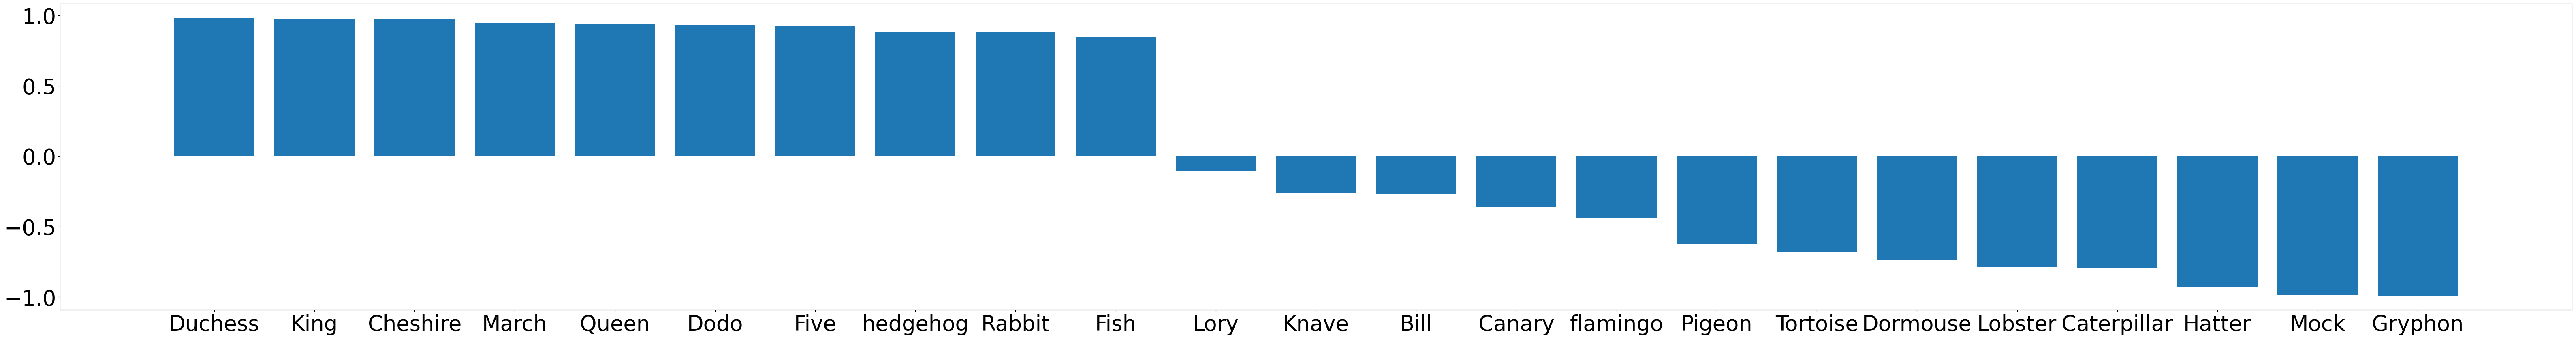

In [116]:
plt.rcParams.update({'font.size': 38})
plt.figure(figsize = (80, 10), dpi = 100)
plt.bar(range(len(compoundScoresDictFiltered)), list(compoundScoresDictFiltered.values()), align='center')
plt.xticks(range(len(compoundScoresDictFiltered)), list(compoundScoresDictFiltered.keys()))
plt.show()

After extracting the polarity scores, I looked at their compound scores to make further insights about the text.The closer the compound score is to positive one, the higher the positivity of the text. While Alice’s compound score is relatively neutral, we see characters like the Hatter ranked third highest for the most negativity in the text surrounding his character. On the other hand, the White Rabbit, Queen, King, and Duchess have compound scores greater than 0.88. We previously talked about how the flamingo and hedgehog as animals with no human qualities are at the bottom of Wonderland’s society, so it’s interesting how the flamingo has a negative compound score and the hedgehog has a positive compound score. From analyzing the concordances, the flamingo most likely has a negative score because the Duchess tells Alice that she’s “doubtful about the temper” of her flamingo and that they might bite.

# Part 4: Conclusion

Overall, through these visualizations and textual analysis, we see that in Victorian England, there are clearly defined rules and social structures set in place defined by class and gender. In Wonderland, these Victorian England rules are non-existent and nonsensical yet Alice tries to follow them to the best of her ability as a human trying to navigate this world and communicate with fantastical creatures. Anthropomorphic creatures, like the White Rabbit, belong to a higher social hierarchy than that of plain animals and humans in Wonderland mirror the Victorian class model of citizens belonging to the lower class, middle class, upper class, and royalty.


Alice's journey to understand the inner workings of how to communicate and behave while navigating Wonderland's complex hierarchy proves futile in the climatic ending.

> “No, no!” said the Queen. “Sentence first—verdict afterwards.” “Stuff and nonsense!” said Alice loudly. “The idea of having the sentence first!” “Hold your tongue!” said the Queen, turning purple. “I won’t!” said Alice. “Off with her head!” the Queen shouted at the top of her voice. Nobody moved. “Who cares for you?” said Alice, (she had grown to her full size by this time.) “You’re nothing but a pack of cards!” (CHAPTER XII. Alice’s Evidence)

Alice _wakes_ up from Wonderland because of her refusal to conform to the "norms" of the realm. Abiding by what she has been taught in Victorian England and stickling solely to these roots releases her back into the world of logic and reason. There is no compromise in how things are down in each "land" and its inhabitants.

# Works Cited

_Characteristics of Victorian Era Literature, Novels, and Poetry_. https://victorian-era.org/victorian-era-literature-characteristics.html

Carroll, L., 2015. _Alice's Adventures in Wonderland._ 11th ed. [ebook] Gutenberg. Available at: <http://www.gutenberg.org/files/11/11-h/11-h.htm>.